In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def holm_corr(p):
    argsorted_p = np.argsort(p)
    sorted_p = np.sort(p)
    corrected_p = np.zeros(len(p))
    corrected_p_orig = np.zeros(len(p))
    for i, p_val in enumerate(sorted_p):
        if i != 0:
            corrected_p[i] = np.maximum(corrected_p[i-1], np.minimum((len(p) - i + 1)*p_val, 1))
        else:
            corrected_p[i] = np.minimum((len(p) - i + 1)*p_val, 1)
    corrected_p_orig[argsorted_p] = corrected_p
    return corrected_p_orig

In [5]:
from scipy.stats import brunnermunzel

def statistics(size, n_runs, N_ANTS, a_p, rho, min_acc):
    x1 = np.zeros((size, n_runs))
    x2 = np.zeros((size, n_runs))
    for k in range(n_runs):
        fname = f"data/fashion-pruned_percentage-accuracies_aco_baseline-{N_ANTS}-{a_p}-{rho}-{min_acc}-{k}.txt"
        lines = np.loadtxt(fname, comments="#", delimiter=",", unpack=False)

        x1[:, k] = lines[1, :]
        x2[:, k] = lines[2, :]
    
    xmean1 = np.mean(x1, axis = 1)
    xmean2 = np.mean(x2, axis = 1)
    binned_x1 = np.reshape(xmean1, (int(len(x1)/n), n))
    binned_x2 = np.reshape(xmean2, (int(len(x1)/n), n))

    p_vals = np.zeros(int(len(x1)/n))
    w_stat = np.zeros(int(len(x1)/n))
    for i, (bins1, bins2) in enumerate(zip(binned_x1, binned_x2)):
        # p_vals[i] = permute_test(bins1, bins2, n_shuffles)
        w_stat[i], p_vals[i] = brunnermunzel(bins2, bins1, "two-sided", "normal")
        
    return w_stat, p_vals
    

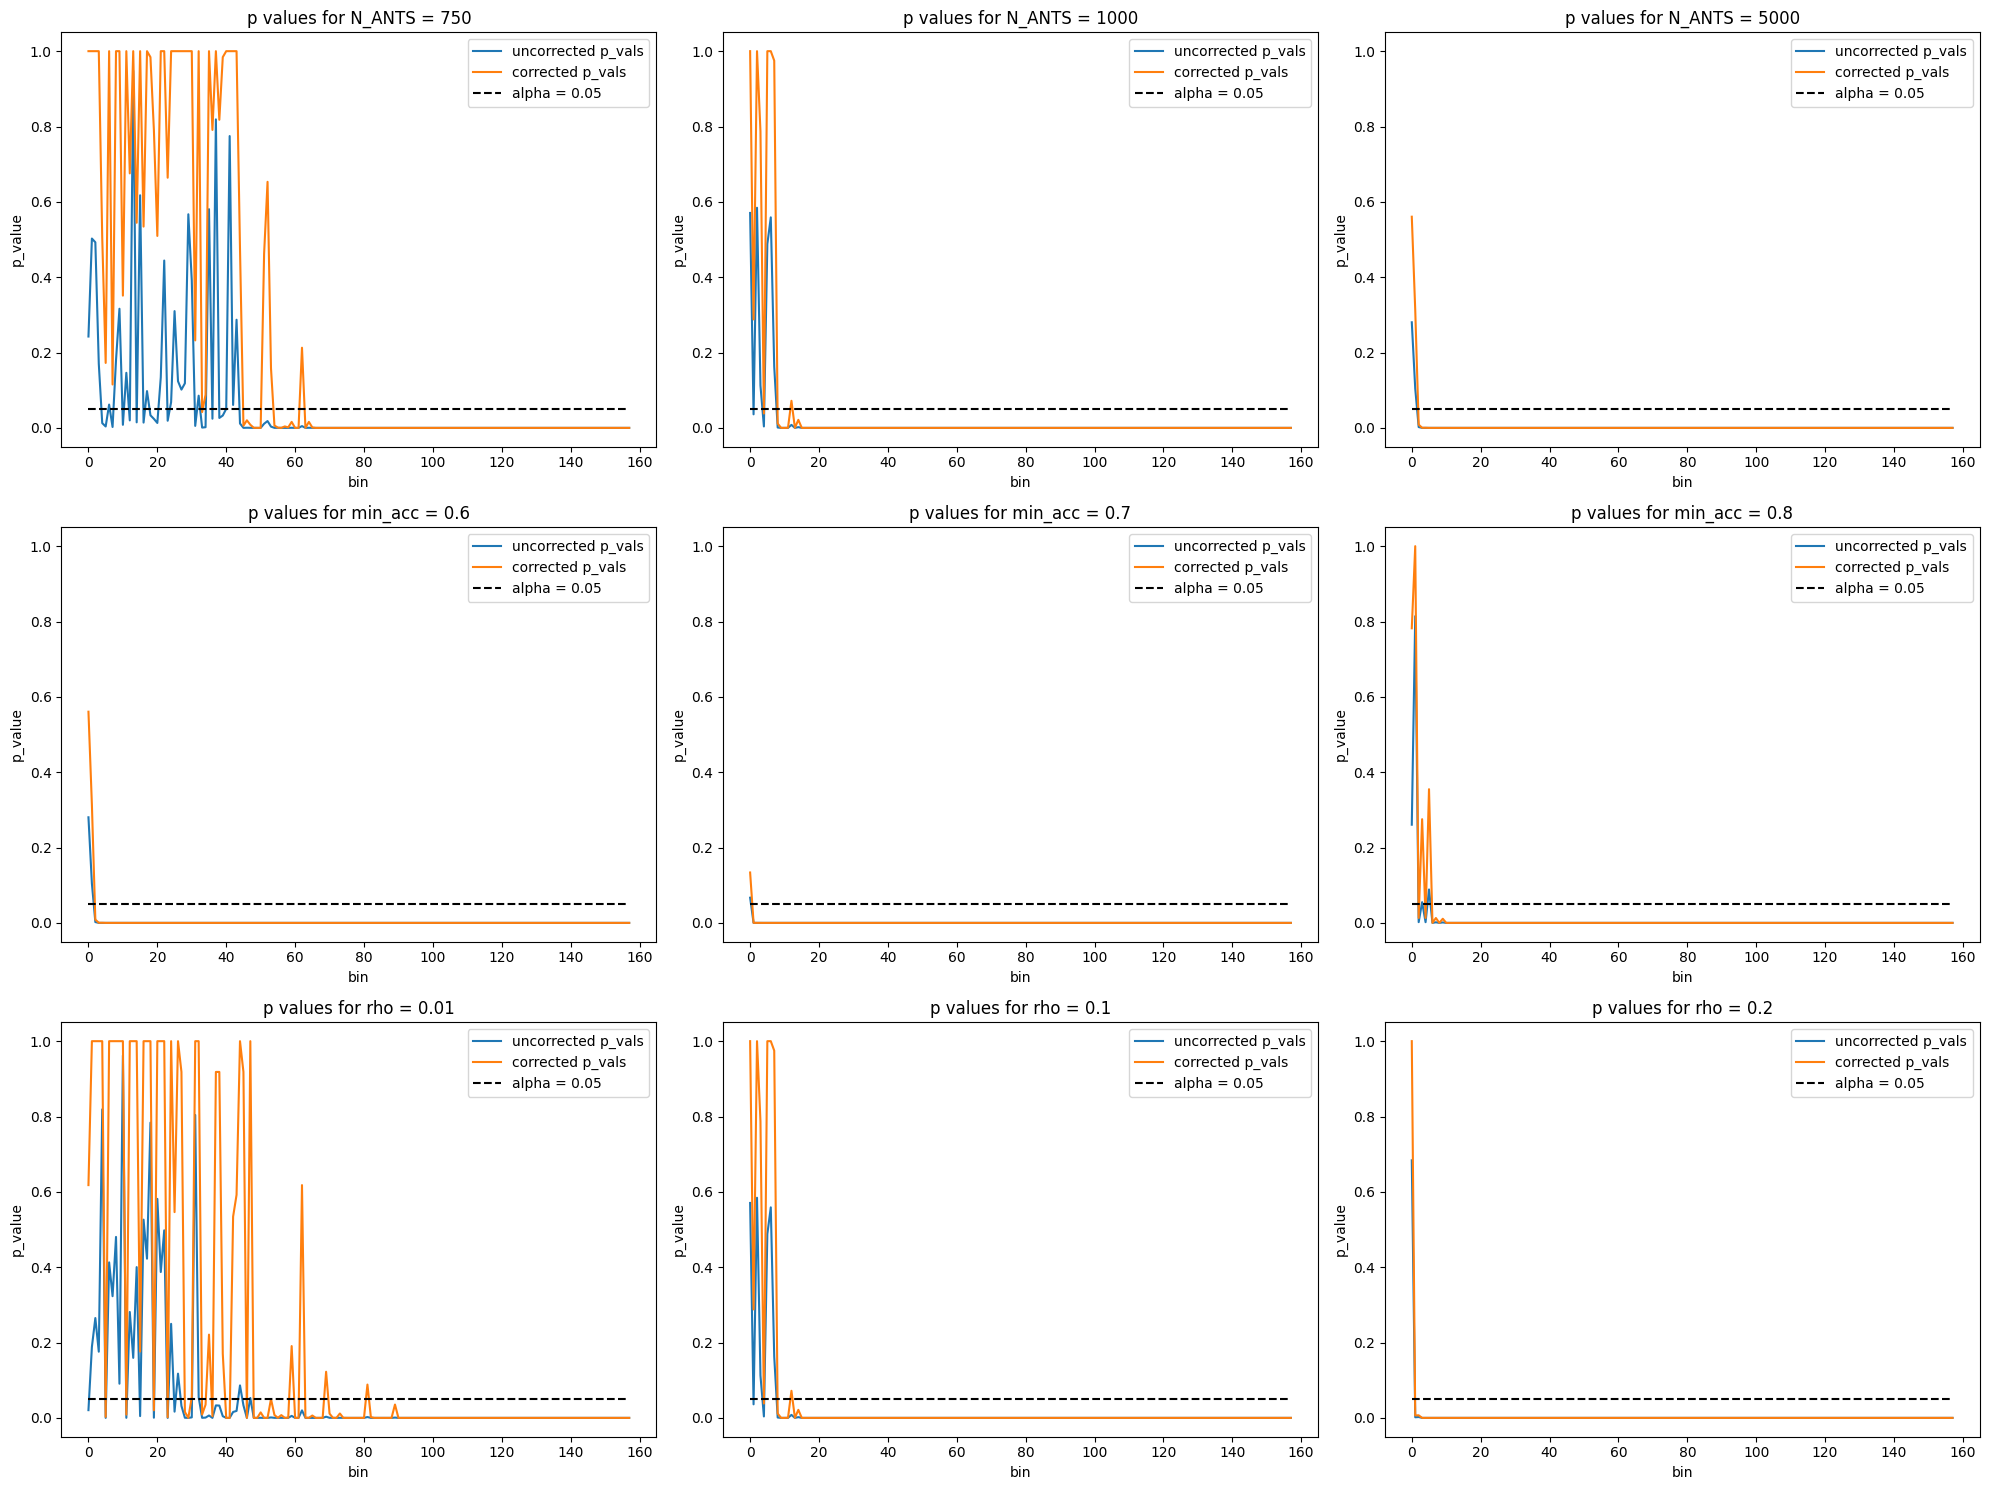

In [7]:

n = 25 
n_shuffles = 1000

rho = 0.1
a_p= 1.0
N_ANTS = 1000
min_acc = 0.6
n_runs = 5
size = 3950

rhos = [0.01, 0.1, 0.2]
N_ANTS_VEC = [750, 1000, 5000]
min_accs = [0.6, 0.7, 0.8]


p_rho = np.zeros(len(rhos))
fig, ax = plt.subplots(3, 3, figsize = (20, 15))

for j, N_ANTS in enumerate(N_ANTS_VEC):
    rho = 0.1
    min_acc = 0.6
    w_stat, p_vals = statistics(size, n_runs, N_ANTS, a_p, rho, min_acc)

    ax[0, j].plot(p_vals, label = "uncorrected p_vals")
    ax[0, j].set_ylim(-0.05, 1.05)
    # print(np.sum(p_vals == 0))
    
    sign_p = holm_corr(p_vals)
    ax[0, j].plot(sign_p, label = "corrected p_vals")
    ax[0, j].plot(np.zeros(len(sign_p))+0.05, label = "alpha = 0.05", c = "black", linestyle="dashed")
    ax[0, j].set_title(f"p values for N_ANTS = {N_ANTS}")

    ax[0, j].set_ylabel("p_value")
    ax[0, j].set_xlabel("bin")
    ax[0, j].legend()
    # ax[3, 0].plot(w_stat, label = f"N_ANTS = {N_ANTS}")
    # ax[3, 0].legend()

for j, min_acc in enumerate(min_accs):
    rho = 0.1
    N_ANTS = 5000

    w_stat, p_vals = statistics(size, n_runs, N_ANTS, a_p, rho, min_acc)

    ax[1, j].plot(p_vals, label = "uncorrected p_vals")
    ax[1, j].set_ylim(-0.05, 1.05)

    # print(np.sum(p_vals == 0))
    
    sign_p = holm_corr(p_vals)
    ax[1, j].plot(sign_p, label = "corrected p_vals")
    ax[1, j].plot(np.zeros(len(sign_p))+0.05, label = "alpha = 0.05", c = "black", linestyle="dashed")
    ax[1, j].set_title(f"p values for min_acc = {min_acc}")

    ax[1, j].set_ylabel("p_value")
    ax[1, j].set_xlabel("bin")
    ax[1, j].legend()
    # ax[3, 1].plot(w_stat, label = f"min_acc = {min_acc}")
    # ax[3, 1].legend()

for j, rho in enumerate(rhos):
    N_ANTS = 1000
    min_acc = 0.6
    w_stat, p_vals = statistics(size, n_runs, N_ANTS, a_p, rho, min_acc)

    ax[2, j].plot(p_vals, label = "uncorrected p_vals")
    ax[2, j].set_ylim(-0.05, 1.05)

    # print(np.sum(p_vals == 0))
    
    sign_p = holm_corr(p_vals)
    ax[2, j].plot(sign_p, label = "corrected p_vals")
    ax[2, j].plot(np.zeros(len(sign_p))+0.05, label = "alpha = 0.05", c = "black", linestyle="dashed")
    ax[2, j].set_title(f"p values for rho = {rho}")

    ax[2, j].set_ylabel("p_value")
    ax[2, j].set_xlabel("bin")
    ax[2, j].legend()
    # ax[3, 2].plot(w_stat, label = f" rho = {rho}")
    # ax[3, 2].legend()

plt.tight_layout()
# plt.savefig("p_val_plots.png")
plt.show()